In [1]:
import pandas as pd

url = 'https://pt.wikipedia.org/wiki/Lista_de_presidentes_do_Brasil'
dfs = pd.read_html(url, header=0)
df = dfs[0]  # tabela principal
df.head()

,N°,Presidente,Fotografia,Período do mandato (duração do mandato),Partido,Vice-presidente,Eleição,Notas e referências
0,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...
1,1,Deodoro da Fonseca,NaN,15 de novembro de 1889 – 23 de novembro de 189...,Nenhum,Nenhum,Proclamação de 1889,[nota 1] [1]
2,1,Deodoro da Fonseca,NaN,15 de novembro de 1889 – 23 de novembro de 189...,Nenhum,Floriano Peixoto [nota 2],1891,[nota 1] [1]
3,2,Floriano Peixoto,NaN,23 de novembro de 1891 – 15 de novembro de 189...,Nenhum,Nenhum,–,[nota 3] [2]
4,3,Prudente de Morais,NaN,15 de novembro de 1894 – 15 de novembro de 189...,PR Federal,Manuel Vitorino,1894,[3]


In [2]:
df.columns = ['ordem', 'nome', 'foto', 'periodo', 'partido', 'vice', 'eleicao', 'notas']
df.drop(columns=['foto', 'notas'], inplace=True)
df = df[df['nome'].notna()]
df.head()

,ordem,nome,periodo,partido,vice,eleicao
0,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...
1,1,Deodoro da Fonseca,15 de novembro de 1889 – 23 de novembro de 189...,Nenhum,Nenhum,Proclamação de 1889
2,1,Deodoro da Fonseca,15 de novembro de 1889 – 23 de novembro de 189...,Nenhum,Floriano Peixoto [nota 2],1891
3,2,Floriano Peixoto,23 de novembro de 1891 – 15 de novembro de 189...,Nenhum,Nenhum,–
4,3,Prudente de Morais,15 de novembro de 1894 – 15 de novembro de 189...,PR Federal,Manuel Vitorino,1894


In [3]:
import locale
from datetime import datetime

df[['data_inicio', 'data_fim']] = df['periodo'].str.extract(r'(\d{1,2} de \w+ de \d{4})\s*–\s*(\d{1,2} de \w+ de \d{4})')

meses = {
    'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4, 'maio': 5, 'junho': 6,
    'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12
}

# Função para converter string de data para datetime
def parse_data(data_str):
    if pd.isna(data_str):
        return pd.NaT
    try:
        # Dividir a string em partes: dia, mês, ano
        partes = data_str.split(' de ')
        dia = int(partes[0])
        mes = meses[partes[1].lower()]
        ano = int(partes[2])
        return datetime(ano, mes, dia)
    except Exception as e:
        print(f"Erro ao parsear data '{data_str}': {e}")
        return pd.NaT

# Aplicar a função de conversão para cada coluna
df['data_inicio'] = df['data_inicio'].map(parse_data)
df['data_fim'] = df['data_fim'].map(parse_data)

df['duracao_dias'] = (df['data_fim'] - df['data_inicio']).dt.days

df.head()

,ordem,nome,periodo,partido,vice,eleicao,data_inicio,data_fim,duracao_dias
0,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,NaT,NaT,NaN
1,1,Deodoro da Fonseca,15 de novembro de 1889 – 23 de novembro de 189...,Nenhum,Nenhum,Proclamação de 1889,1889-11-15,1891-11-23,738.0
2,1,Deodoro da Fonseca,15 de novembro de 1889 – 23 de novembro de 189...,Nenhum,Floriano Peixoto [nota 2],1891,1889-11-15,1891-11-23,738.0
3,2,Floriano Peixoto,23 de novembro de 1891 – 15 de novembro de 189...,Nenhum,Nenhum,–,1891-11-23,1894-11-15,1088.0
4,3,Prudente de Morais,15 de novembro de 1894 – 15 de novembro de 189...,PR Federal,Manuel Vitorino,1894,1894-11-15,1898-11-15,1461.0


In [4]:
df['partido'] = df['partido'].str.strip()
df['eleicao'] = df['eleicao'].str.strip().str.lower()

df.drop_duplicates(subset=['nome', 'data_inicio'], inplace=True)

df.head()

,ordem,nome,periodo,partido,vice,eleicao,data_inicio,data_fim,duracao_dias
0,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,primeira república (república velha) (15 de no...,NaT,NaT,NaN
1,1,Deodoro da Fonseca,15 de novembro de 1889 – 23 de novembro de 189...,Nenhum,Nenhum,proclamação de 1889,1889-11-15,1891-11-23,738.0
3,2,Floriano Peixoto,23 de novembro de 1891 – 15 de novembro de 189...,Nenhum,Nenhum,–,1891-11-23,1894-11-15,1088.0
4,3,Prudente de Morais,15 de novembro de 1894 – 15 de novembro de 189...,PR Federal,Manuel Vitorino,1894,1894-11-15,1898-11-15,1461.0
5,4,Campos Sales,15 de novembro de 1898 – 15 de novembro de 190...,PRP,Rosa e Silva,1898,1898-11-15,1902-11-15,1460.0


In [5]:
df.drop('periodo', axis=1, inplace=True)
df.head()

,ordem,nome,partido,vice,eleicao,data_inicio,data_fim,duracao_dias
0,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,primeira república (república velha) (15 de no...,NaT,NaT,NaN
1,1,Deodoro da Fonseca,Nenhum,Nenhum,proclamação de 1889,1889-11-15,1891-11-23,738.0
3,2,Floriano Peixoto,Nenhum,Nenhum,–,1891-11-23,1894-11-15,1088.0
4,3,Prudente de Morais,PR Federal,Manuel Vitorino,1894,1894-11-15,1898-11-15,1461.0
5,4,Campos Sales,PRP,Rosa e Silva,1898,1898-11-15,1902-11-15,1460.0


In [6]:
import re

# Função para limpar "[nota 1]", "[nota 2]", etc.
def remover_notas(texto):
    if isinstance(texto, str):
        return re.sub(r'\[nota \d+\]', '', texto).strip()
    return texto


# Aplicar em colunas com texto (exemplo: nome, partido, vice)
df['nome'] = df['nome'].apply(remover_notas)
df['partido'] = df['partido'].apply(remover_notas)
df['vice'] = df['vice'].apply(remover_notas)

df.head()

,ordem,nome,partido,vice,eleicao,data_inicio,data_fim,duracao_dias
0,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,Primeira República (República Velha) (15 de no...,primeira república (república velha) (15 de no...,NaT,NaT,NaN
1,1,Deodoro da Fonseca,Nenhum,Nenhum,proclamação de 1889,1889-11-15,1891-11-23,738.0
3,2,Floriano Peixoto,Nenhum,Nenhum,–,1891-11-23,1894-11-15,1088.0
4,3,Prudente de Morais,PR Federal,Manuel Vitorino,1894,1894-11-15,1898-11-15,1461.0
5,4,Campos Sales,PRP,Rosa e Silva,1898,1898-11-15,1902-11-15,1460.0


In [7]:
df.dropna(subset=['data_inicio', 'data_fim', 'duracao_dias'], inplace=True)
df.head()

,ordem,nome,partido,vice,eleicao,data_inicio,data_fim,duracao_dias
1,1,Deodoro da Fonseca,Nenhum,Nenhum,proclamação de 1889,1889-11-15,1891-11-23,738.0
3,2,Floriano Peixoto,Nenhum,Nenhum,–,1891-11-23,1894-11-15,1088.0
4,3,Prudente de Morais,PR Federal,Manuel Vitorino,1894,1894-11-15,1898-11-15,1461.0
5,4,Campos Sales,PRP,Rosa e Silva,1898,1898-11-15,1902-11-15,1460.0
6,5,Rodrigues Alves,PRP,Afonso Pena,1902,1902-11-15,1906-11-15,1461.0


In [8]:
presidentes = df[['nome']].drop_duplicates().reset_index(drop=True)
presidentes['id_presidente'] = presidentes.index + 1

presidentes.head()

,nome,id_presidente
0,Deodoro da Fonseca,1
1,Floriano Peixoto,2
2,Prudente de Morais,3
3,Campos Sales,4
4,Rodrigues Alves,5


In [9]:
partidos = df[['partido']].drop_duplicates().reset_index(drop=True)
partidos['id_partido'] = partidos.index + 1
partidos.head()

,partido,id_partido
0,Nenhum,1
1,PR Federal,2
2,PRP,3
3,PRM,4
4,PRF,5


In [10]:
vices = df[['vice']].dropna().drop_duplicates().reset_index(drop=True)
vices['id_vice'] = vices.index + 1

vices.head()

,vice,id_vice
0,Nenhum,1
1,Manuel Vitorino,2
2,Rosa e Silva,3
3,Afonso Pena,4
4,Nilo Peçanha,5


In [11]:
df = df.merge(presidentes, on='nome')
df = df.merge(partidos, on='partido', how='left')
df = df.merge(vices, on='vice', how='left')

mandatos = df[['id_presidente', 'id_partido', 'data_inicio', 'data_fim', 'duracao_dias', 'eleicao', 'id_vice']]
mandatos = mandatos.reset_index(drop=True)
mandatos['id_mandato'] = mandatos.index + 1

mandatos.head()

,id_presidente,id_partido,data_inicio,data_fim,duracao_dias,eleicao,id_vice,id_mandato
0,1,1,1889-11-15,1891-11-23,738.0,proclamação de 1889,1,1
1,2,1,1891-11-23,1894-11-15,1088.0,–,1,2
2,3,2,1894-11-15,1898-11-15,1461.0,1894,2,3
3,4,3,1898-11-15,1902-11-15,1460.0,1898,3,4
4,5,3,1902-11-15,1906-11-15,1461.0,1902,4,5


In [12]:
presidentes.to_csv('presidentes.csv', index=False)
partidos.to_csv('partidos.csv', index=False)
vices.to_csv('vices.csv', index=False)
mandatos.to_csv('mandatos.csv', index=False)

In [13]:
from sqlalchemy import create_engine

# Substitua pelos seus dados de acesso
user = 'root'
password = '1234'
host = 'localhost'
database = 'banco_presidentes'

# Cria a engine de conexão
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')

In [14]:
from sqlalchemy import text

with engine.connect() as conn:
    # Create Presidente table
    conn.execute(text("""
        CREATE TABLE IF NOT EXISTS Presidente (
            id_presidente INT PRIMARY KEY,
            nome VARCHAR(100) NOT NULL
        )
    """))
    
    # Create Partido table
    conn.execute(text("""
        CREATE TABLE IF NOT EXISTS Partido (
            id_partido INT PRIMARY KEY,
            nome_partido VARCHAR(100) NOT NULL
        )
    """))
    
    # Create Vice table
    conn.execute(text("""
        CREATE TABLE IF NOT EXISTS Vice (
            id_vice INT PRIMARY KEY,
            nome_vice VARCHAR(100)
        )
    """))
    
    # Create Mandato table
    conn.execute(text("""
        CREATE TABLE IF NOT EXISTS Mandato (
            id_mandato INT PRIMARY KEY,
            id_presidente INT,
            id_partido INT,
            data_inicio DATE,
            data_fim DATE,
            duracao_dias INT,
            tipo_eleicao VARCHAR(50),
            id_vice INT,
            FOREIGN KEY (id_presidente) REFERENCES Presidente(id_presidente),
            FOREIGN KEY (id_partido) REFERENCES Partido(id_partido),
            FOREIGN KEY (id_vice) REFERENCES Vice(id_vice)
        )
    """))
    conn.commit()


In [15]:
# # Import the data from CSV files into the database tables
# from sqlalchemy import text

# Insert presidentes data
with engine.begin() as conn:
    # Clear existing data if any
    conn.execute(text("DELETE FROM Mandato"))
    conn.execute(text("DELETE FROM Presidente"))
    conn.execute(text("DELETE FROM Partido"))
    conn.execute(text("DELETE FROM Vice"))
    
    # Insert presidentes data
    for _, row in presidentes.iterrows():
        conn.execute(
            text("INSERT INTO Presidente (id_presidente, nome) VALUES (:id, :nome)"),
            {"id": int(row["id_presidente"]), "nome": row["nome"]}
        )
    
    # Insert partidos data
    for _, row in partidos.iterrows():
        conn.execute(
            text("INSERT INTO Partido (id_partido, nome_partido) VALUES (:id, :nome)"),
            {"id": int(row["id_partido"]), "nome": row["partido"]}
        )
    
    # Insert vices data
    for _, row in vices.iterrows():
        conn.execute(
            text("INSERT INTO Vice (id_vice, nome_vice) VALUES (:id, :nome)"),
            {"id": int(row["id_vice"]), "nome": row["vice"]}
        )
    
    # Insert mandatos data
    for _, row in mandatos.iterrows():
        conn.execute(
            text("""
                INSERT INTO Mandato 
                (id_mandato, id_presidente, id_partido, data_inicio, data_fim, 
                 duracao_dias, tipo_eleicao, id_vice) 
                VALUES 
                (:id, :id_pres, :id_part, :dt_inicio, :dt_fim, :dias, :eleicao, :id_vice)
            """),
            {
                "id": int(row["id_mandato"]),
                "id_pres": int(row["id_presidente"]),
                "id_part": int(row["id_partido"]) if not pd.isna(row["id_partido"]) else None,
                "dt_inicio": row["data_inicio"],
                "dt_fim": row["data_fim"],
                "dias": int(row["duracao_dias"]),
                "eleicao": row["eleicao"],
                "id_vice": int(row["id_vice"]) if not pd.isna(row["id_vice"]) else None
            }
        )
    
    print("Data inserted successfully!")

Data inserted successfully!


In [16]:
# Query the data to verify it was inserted correctly
with engine.connect() as conn:
    result = conn.execute(text("SELECT id_presidente, nome FROM Presidente LIMIT 5"))
    print("Presidents in the database:")
    for row in result:
        print(f"ID: {row[0]}, Nome: {row[1]}")

Presidents in the database:
ID: 1, Nome: Deodoro da Fonseca
ID: 2, Nome: Floriano Peixoto
ID: 3, Nome: Prudente de Morais
ID: 4, Nome: Campos Sales
ID: 5, Nome: Rodrigues Alves


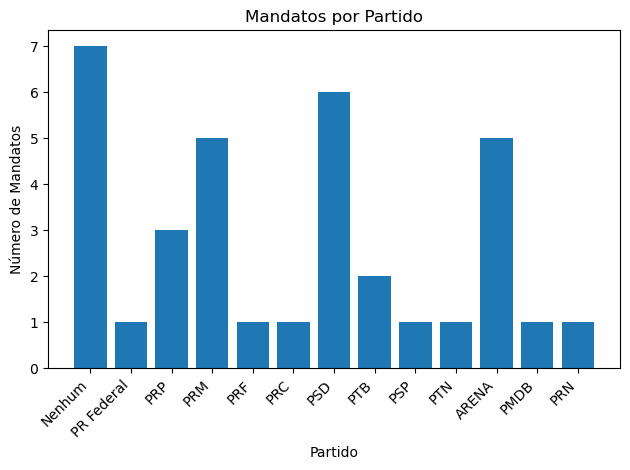

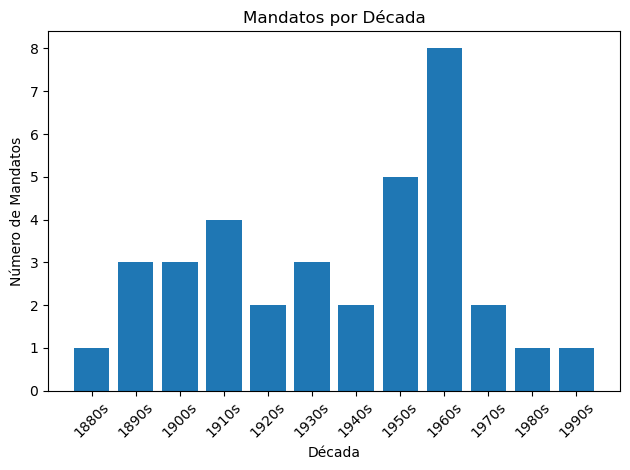

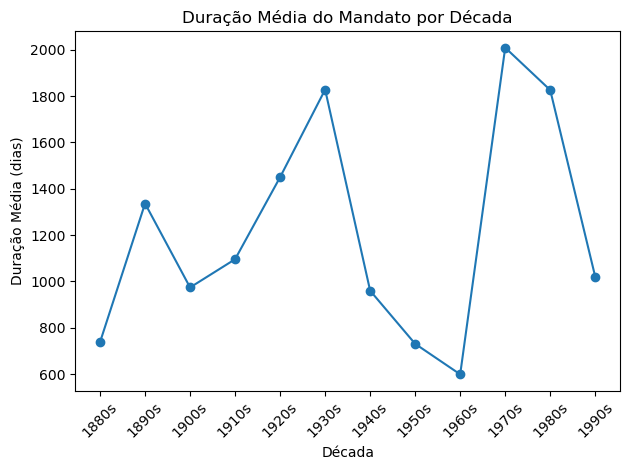

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Definir década
mandatos['decada'] = (mandatos['data_inicio'].dt.year // 10 * 10).astype(str) + 's'

# 1) Mandatos por partido (barras)
counts = mandatos.groupby('id_partido').size().reset_index(name='qtd')
counts = counts.merge(partidos[['id_partido', 'partido']], on='id_partido')

plt.figure()
plt.bar(counts['partido'], counts['qtd'])
plt.xlabel('Partido')
plt.ylabel('Número de Mandatos')
plt.title('Mandatos por Partido')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2) Mandatos por década (barras)
counts_dec = mandatos['decada'].value_counts().sort_index()
plt.figure()
plt.bar(counts_dec.index, counts_dec.values)
plt.xlabel('Década')
plt.ylabel('Número de Mandatos')
plt.title('Mandatos por Década')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Duração média por década (linha)
avg_dur = mandatos.groupby('decada')['duracao_dias'].mean().reset_index()

plt.figure()
plt.plot(avg_dur['decada'], avg_dur['duracao_dias'], marker='o')
plt.xlabel('Década')
plt.ylabel('Duração Média (dias)')
plt.title('Duração Média do Mandato por Década')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()